In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.drop(labels = "Unnamed: 32",axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.drop(labels = "id",axis = 1, inplace = True)

In [8]:
df.columns[12:]

Index(['texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
df.drop(labels = df.columns[11:],axis = 1, inplace = True)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [12]:
scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [14]:
encoder = OneHotEncoder(sparse_output = False)

In [15]:
df.iloc[:,0:1]

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [16]:
enc_data = encoder.fit_transform(df["diagnosis"].values.reshape(-1,1))

In [17]:
enc_data = pd.DataFrame(enc_data, columns = ["B","M"])

In [18]:
df = df.join(enc_data)

In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,B,M
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,0.0,1.0
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.0,1.0
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,0.0,1.0
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.0,1.0
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,0.0,1.0


In [20]:
import seaborn as sns

There is a strong relationship between the radious, perimeter and area. Therefore, we can leave the radius in our analysis 

Text(0, 0.5, 'perimeter_mean')

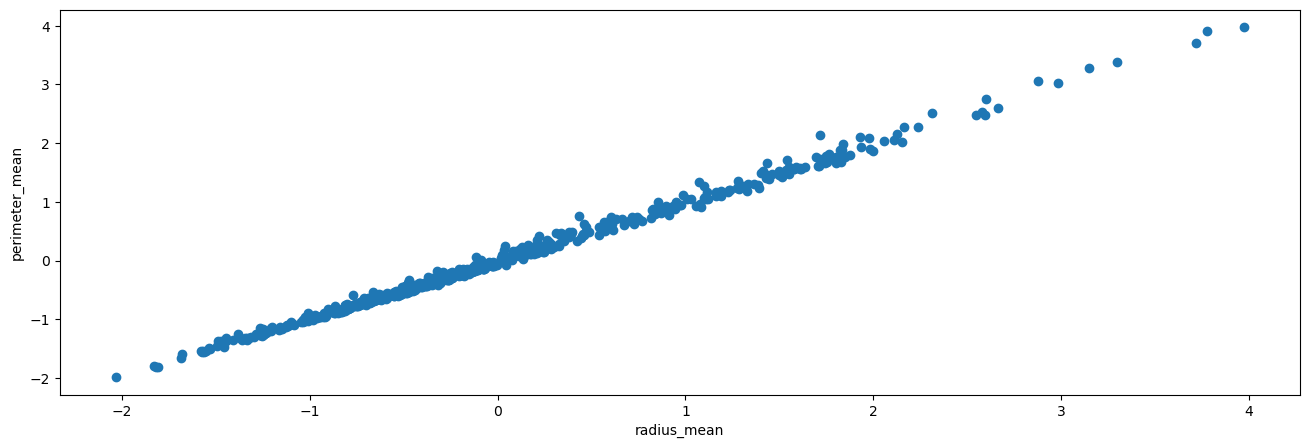

In [21]:
x = df["radius_mean"]
y = df["perimeter_mean"]
plt.figure(figsize= (16,5))
plt.scatter(x,y)
plt.xlabel("radius_mean")
plt.ylabel("perimeter_mean")

Text(0, 0.5, 'area_mean')

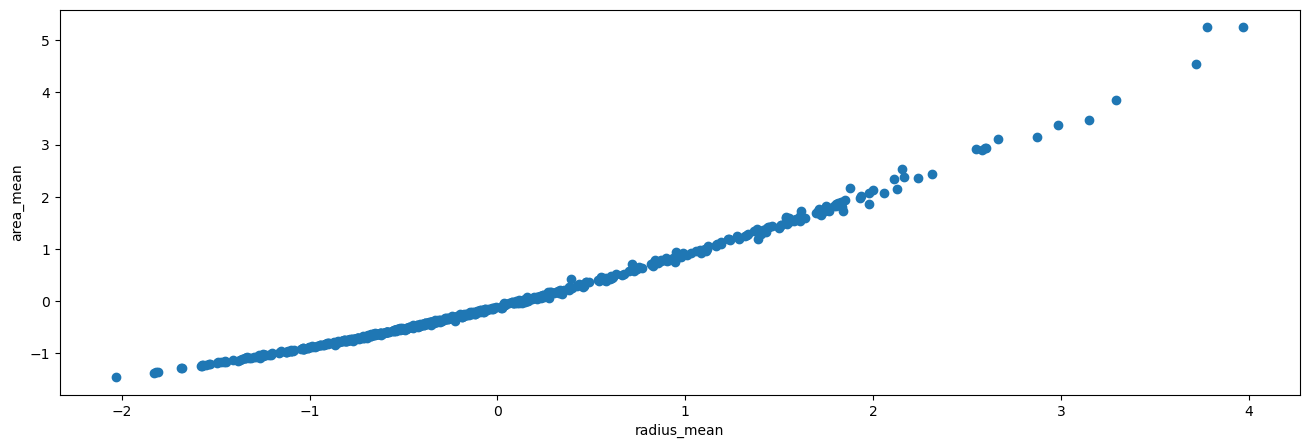

In [22]:
x = df["radius_mean"]
y = df["area_mean"]
plt.figure(figsize= (16,5))
plt.scatter(x,y)
plt.xlabel("radius_mean")
plt.ylabel("area_mean")

In [23]:
# texture_mean is not correlated with any other and therefore it won't give us useful information
df.drop(["perimeter_mean","area_mean", "texture_mean"],axis = 1, inplace = True)


In [24]:
df.iloc[:,1:].corr()

,radius_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,B,M
radius_mean,1.000000,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,-0.730029,0.730029
smoothness_mean,0.170581,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,-0.358560,0.358560
compactness_mean,0.506124,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,-0.596534,0.596534
concavity_mean,0.676764,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,-0.696360,0.696360
concave points_mean,0.822529,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,-0.776614,0.776614
symmetry_mean,0.147741,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,-0.330499,0.330499
fractal_dimension_mean,-0.311631,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.012838,-0.012838
B,-0.730029,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,0.012838,1.000000,-1.000000
M,0.730029,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,-1.000000,1.000000


The maligne cancer has a strong relation with the radius_mean, perimeter_mean, concavity_mean and concave points_mean

<Axes: >

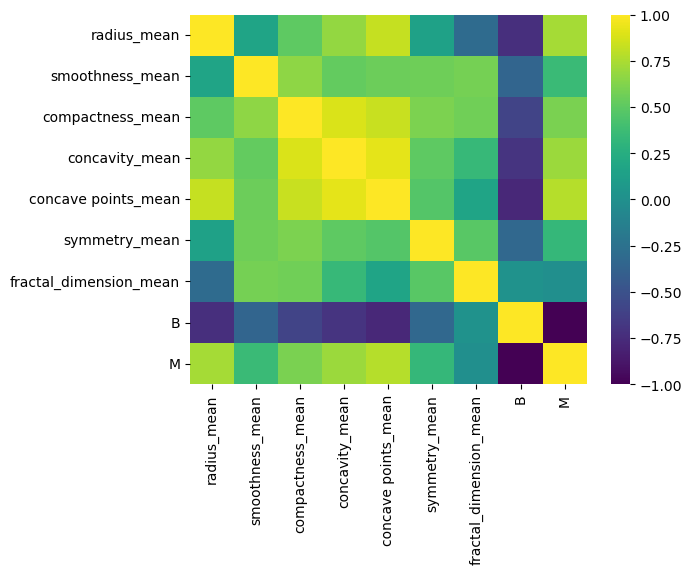

In [25]:
sns.heatmap(data = df.iloc[:,1:].corr(), cmap = "viridis")

We can see two areas where the radius clearly split the cancer between maligne and benigne. Any radius below -1 is beningne and also almost all the radius above 1 is maligne

Text(0.5, 0, 'Radius_mean')

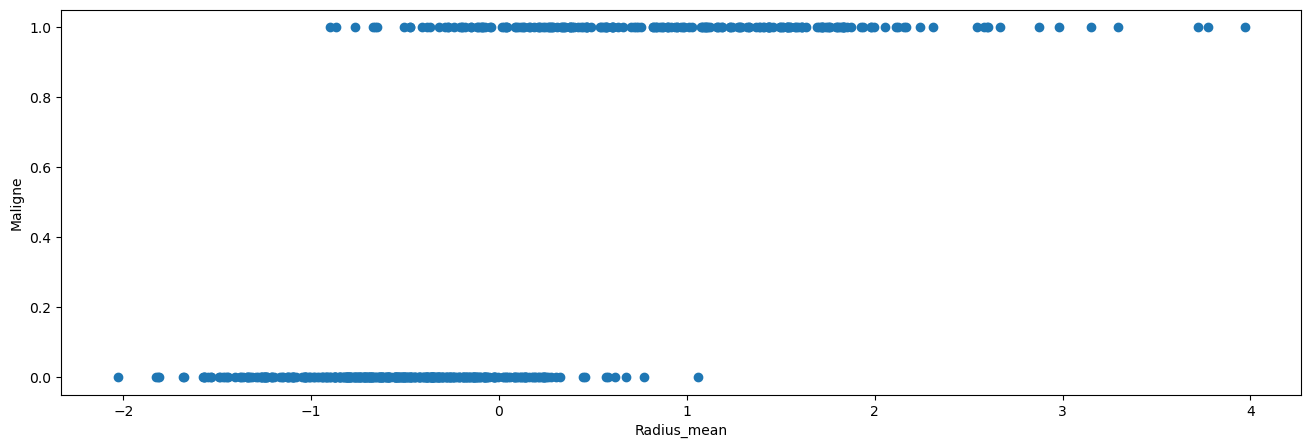

In [30]:
y = df["M"]
x = df["radius_mean"]
plt.figure(figsize= (16,5))
plt.scatter(x,y)
plt.ylabel("Maligne")
plt.xlabel("Radius_mean")

<Axes: xlabel='radius_mean'>

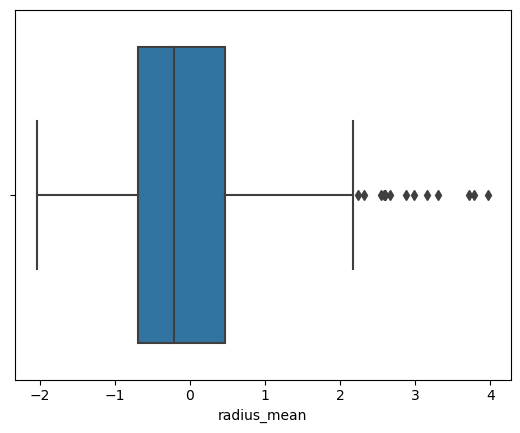

In [27]:
sns.boxplot(x="radius_mean", data= df)

<Axes: xlabel='radius_mean'>

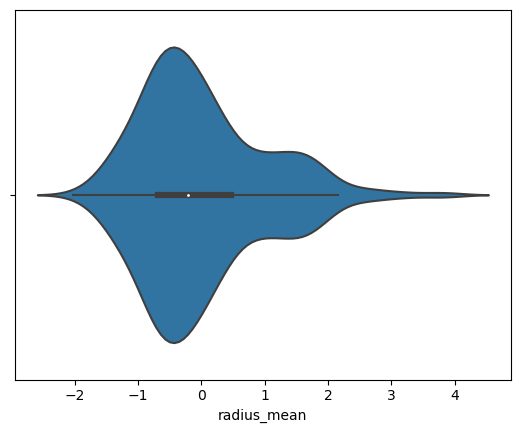

In [28]:
sns.violinplot(x="radius_mean", data= df)